# Wine List Analysis

This analysis provide appropriate customer insights to enable Wine List Corporation develop a targeted marketing and sales strategy so as to maximize sales dollars and minimize marketing dollars

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

- - -

## Load Wine Marketing Data

In [4]:
file_path = Path('./Data/wine_data.csv')
wine_data = pd.read_csv(file_path, encoding='UTF-8')
wine_data.head()

CustId   Education MaritalStat  AnnualInc  NumKids  NumTeen   DateEnrol  \
0       0  Graduation     Married    70951.0        0        0  2013-04-05   
1       1  Graduation      Single    57091.0        0        0  2014-06-15   
2       9      Master      Single    46098.0        1        1  2012-08-18   
3      13         PhD       Widow    25358.0        0        1  2013-07-22   
4      17         PhD     Married    60491.0        0        1  2013-06-09   

   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  AcceptedCmp3  \
0       66       239         10  ...                  1             0   
1        0       464          5  ...                  5             0   
2       86        57          0  ...                  8             0   
3       57        19          0  ...                  6             0   
4       81       637         47  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Age  \
0             0             0             0             0         0   36   
1             0             0             0             1         0   60   
2             0             0             0             0         0   46   
3             0             0             0             0         0   74   
4             0             0             0             0         0   50   

   Age Group  Income Bracket  
0      30-40         70K-80K  
1      50-60         50K-60K  
2      40-50         40K-50K  
3      70-80         20K-30K  
4      40-50         60K-70K  

[5 rows x 27 columns]

- - -

## Customer Segments Analysis

In [6]:
'''
  Analysis: Wine consumption based on Age Groups

- It can be said that wine consumption is generally among people who are 30 years and above
- Highest consumers are those in age group of 40-50 years
- Target customer age group should be in the broad range of 30-70 years
'''

df = wine_data.groupby('Age Group').count()['CustId']
df.hvplot.bar(x='Age Group', xlabel='Age Group', ylabel='Number of Consumers', title='Wine consumption based on Age Groups')

:Bars   [Age Group]   (CustId)

In [10]:
'''
  Analysis: Total Wine Sales per Income Bracket
  
- It can be said that customers who buy wines are generally in the income range of $60-$80k
- It also seems that Winelist does not have customers in the higher income range of $100k and above
'''

df = wine_data.groupby('Income Bracket').sum()['MntWines']
df.hvplot.barh(x='Income Bracket', y='MntWines', xlabel='Income Bracket', ylabel='Total Wine Sales ($)', xformatter='%.0f', title='Total Wine Sales per Income Bracket')

:Bars   [Income Bracket]   (MntWines)

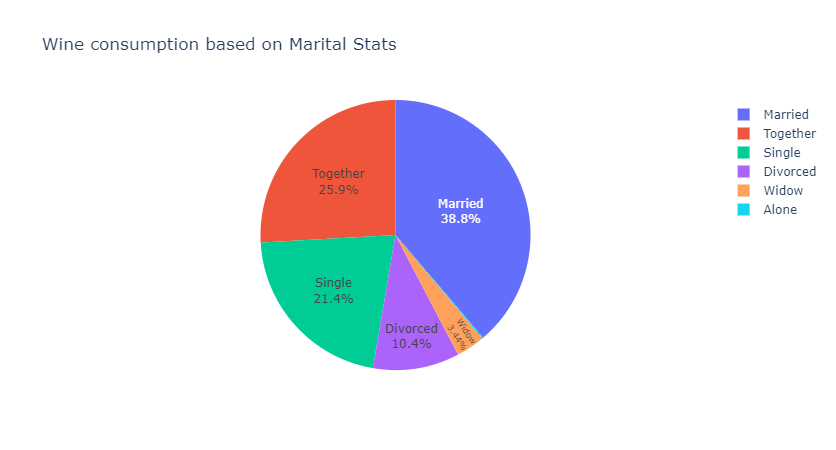

In [11]:
'''
  Analysis: Wine consumption based on Marital Stats
  
- Wine sales to married and together customers constitutes more than 60% of sales 
- The next highest customer segment in this category is "Singles"
'''

df = wine_data.groupby('MaritalStat').count()['CustId'].reset_index()
df = df.rename(columns={'CustId':'count'})
fig = px.pie(df, names='MaritalStat', values='count', title='Wine consumption based on Marital Stats')
fig.update_traces(textposition='inside', textinfo='percent+label')

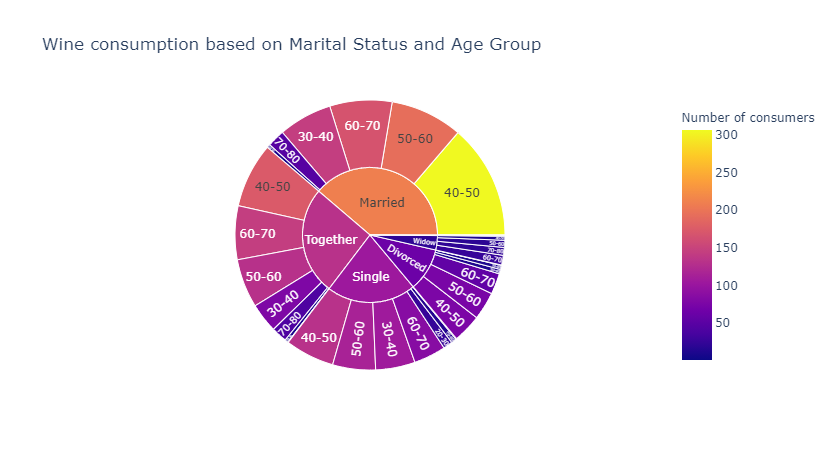

In [13]:
'''
  Analysis: Customer analysis by marital status and age
  
- This chart reconfirms that the majority of Winlist customers are married/together and in the age group 40-50 years.
'''

df = wine_data.groupby(['MaritalStat','Age Group']).count()['CustId'].reset_index()
df = df.rename(columns={'CustId':'Number of consumers'})
df = df.loc[df['Number of consumers']!= 0] # Excluding 0 records

px.sunburst(
    df, 
    path=['MaritalStat','Age Group'],
    values='Number of consumers',
    color='Number of consumers',
    title='Wine consumption based on Marital Status and Age Group')

In [14]:
'''
  Analysis: Analysis of sales based on marital status and education
- Wine sales are significantly higher amongst the educated, particularly graduates
- This chart also reinforces that "married" and "together" customers are the largest segment of wine customers
'''
df = wine_data.groupby(['Education', 'MaritalStat']).sum()['MntWines']
df.hvplot.bar(xlabel='Education and Marital Stat', ylabel='Total Sales ($)', title='Total Sales based on Education and Marital Stat', rot=90, yformatter='%.0f')

:Bars   [Education,MaritalStat]   (MntWines)

- - -

## Sales Channels Analysis

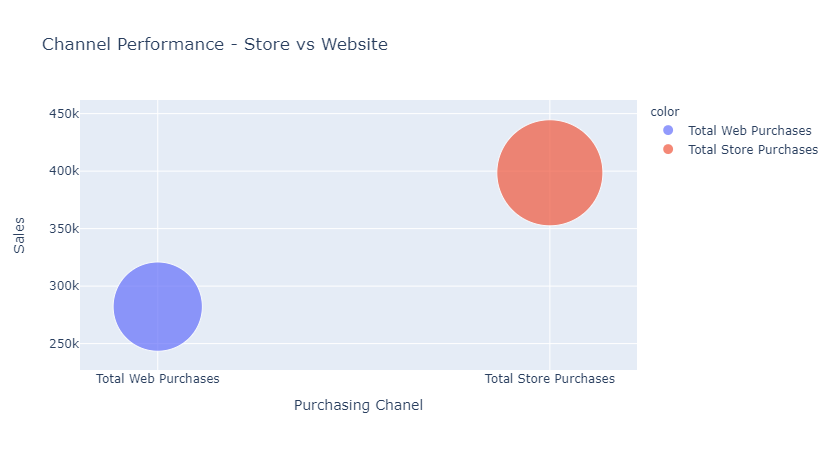

In [113]:
'''
This section analyses stores sales versus web site sales based on the proportion of transactions at store and at website

  Analysis: Customer Purchasing channels and their effectiveness

- It can be said that instore sales are higher than sales through company website
'''

df = wine_data[['MntWines','NumWebPurchases','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases']]
web_store_total_purchases = df['NumWebPurchases'] + df['NumStorePurchases']

df['WebSales'] = df['MntWines'] * df['NumWebPurchases'] / (web_store_total_purchases)
df['StoreSales'] = df['MntWines'] * df['NumStorePurchases'] / (web_store_total_purchases)

df_webstore = pd.DataFrame({
    'Sales': [df['WebSales'].sum().round(), 
              df['StoreSales'].sum().round()]
})

fig = px.scatter(df_webstore, 
                 x=['Total Web Purchases','Total Store Purchases'],
                 y='Sales',
                 color=['Total Web Purchases','Total Store Purchases'], 
                 labels={'x':'Purchasing Chanel', 'y':'Sales ($)'},
                 size='Sales',
                 title = 'Channel Performance - Store vs Website',
                 size_max=75)

fig.show()

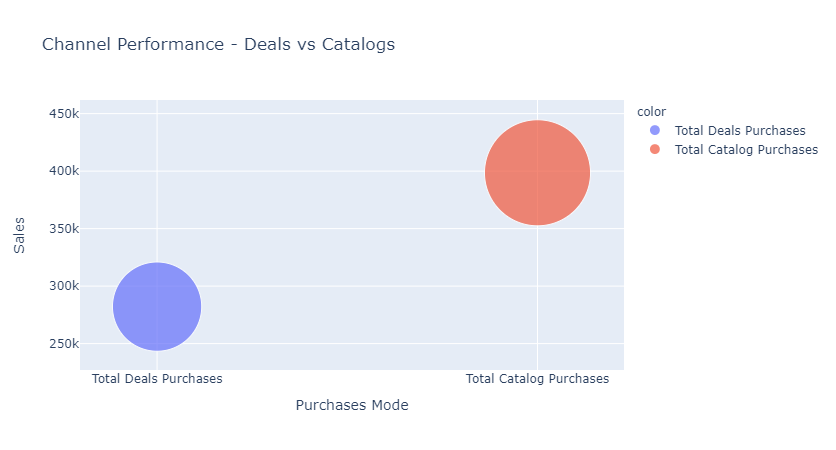

In [112]:
'''
This section analyses catalog sales versus deals sales based on the proportion of transactions for deals and for catalog
  
  Analysis: Customer Purchasing channels and their effectiveness
  
- Catalogs seem to be more effective in bringing in customers to stores
'''

deal_catalog_total_purchases = df['NumDealsPurchases'] + df['NumCatalogPurchases']
df['DealsSales'] = df['MntWines'] * df['NumDealsPurchases'] / (deal_catalog_total_purchases)
df['CatalogSales'] = df['MntWines'] * df['NumCatalogPurchases'] / (deal_catalog_total_purchases)


df_dealcat = pd.DataFrame({
    'Sales': [df['DealsSales'].sum().round(), 
              df['CatalogSales'].sum().round()]
})

fig = px.scatter(df_webstore, 
                 x=['Total Deals Purchases','Total Catalog Purchases'],
                 y='Sales',
                 color=['Total Deals Purchases','Total Catalog Purchases'],
                 labels = {'x':'Purchases Mode', 'y':'Sales ($)'},
                 size='Sales', 
                 title = 'Channel Performance - Deals vs Catalogs', 
                 size_max=75)
fig.show()

- - -

## Campaign Performances Analysis

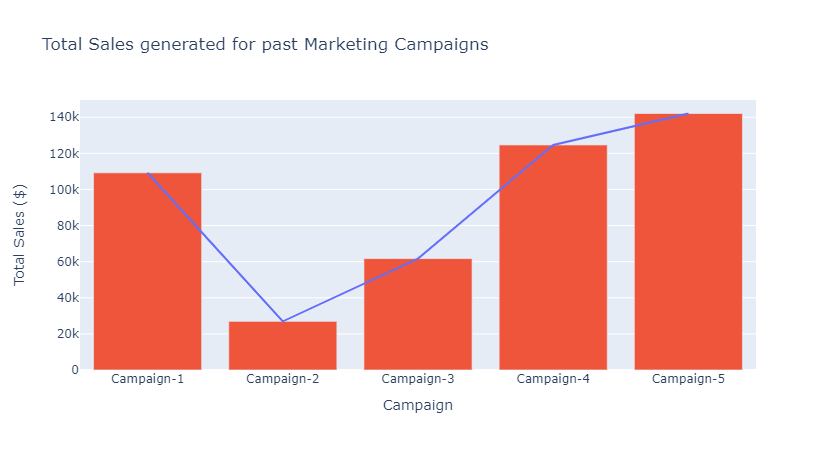

In [34]:
'''
  Analysis: Determine which campaign was the most effective
  
- Campaign 5 was the most effective in successfully concluding with a sale on either channel.
Note: In the absence of channel specific sales data, the overall sales per customer is used to indicate the sales trend.
'''

# Calculating each Marketing Campaign sales figues based on Customer Acceptance
campaign_1_total_sales = wine_data.loc[wine_data['AcceptedCmp1'] == 1].sum()['MntWines']
campaign_2_total_sales = wine_data.loc[wine_data['AcceptedCmp2'] == 1].sum()['MntWines']
campaign_3_total_sales = wine_data.loc[wine_data['AcceptedCmp3'] == 1].sum()['MntWines']
campaign_4_total_sales = wine_data.loc[wine_data['AcceptedCmp4'] == 1].sum()['MntWines']
campaign_5_total_sales = wine_data.loc[wine_data['AcceptedCmp5'] == 1].sum()['MntWines']

# Create a new DataFrame based on these data
df = pd.DataFrame({
    'Campaign':['Campaign-1', 'Campaign-2', 'Campaign-3', 'Campaign-4', 'Campaign-5'],
    'Total Sales ($)': [campaign_1_total_sales, 
                        campaign_2_total_sales, 
                        campaign_3_total_sales, 
                        campaign_4_total_sales, 
                        campaign_5_total_sales]
})

# Added a Trend line over the bar
fig = px.line(df, x='Campaign', y='Total Sales ($)', title='Total Sales generated for past Marketing Campaigns')

# Plotting a bar graph
fig.add_bar(x=['Campaign-1', 'Campaign-2', 'Campaign-3', 'Campaign-4', 'Campaign-5'], 
            y=[campaign_1_total_sales, 
               campaign_2_total_sales, 
               campaign_3_total_sales, 
               campaign_4_total_sales, 
               campaign_5_total_sales],
            showlegend=False)

In [37]:
'''
  Analysis: Determine the product within customer Food basket spending that aligns best to wine purchases
  
- Based on below, customer who buys Wine generally purchases meat.
'''

df = wine_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
df.hvplot.line(xlabel = 'Amount', 
          ylabel= 'Number',
          title = 'Food Basket Comparison')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

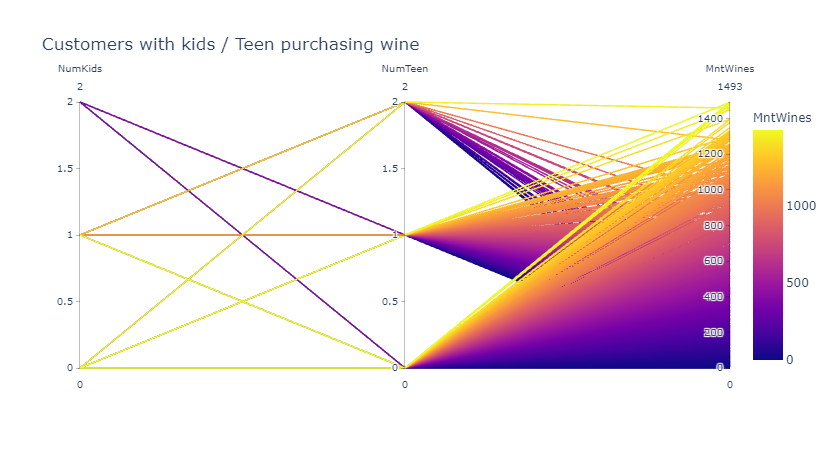

In [52]:
'''
  Analysis: Customrs with teen kids purchase wine

- Based on below, wine consumers have teenage kids due to the age factor. No direct impact on wine consumption.
'''

df = wine_data[['MntWines','NumKids','NumTeen']]
px.parallel_coordinates(df, 
                        ['NumKids','NumTeen', 'MntWines'],
                       color = 'MntWines',
                       title = 'Customers with kids / Teen purchasing wine')